In [334]:
Nfft=1024;  #Number of frequency bands
P=16;        #PFF taps

import numpy as np
import matplotlib.pyplot as plt
Nf2=Nfft//2;

#Load polyphase filter coefficients
#W=np.load("coef4_%i_%i.npy" % (Nfft,P)).reshape([P,Nfft])
#WI=W[::-1,:]

#Functions to calculate PFF and inverse PFF
def fftw(A,W,P):
  Nfft=A.shape[-1]
  Dx=A[:-P,:]*W[0]
  for i in range(1,P): Dx+=A[i:-P+i,:]*W[i]
  return np.fft.fft(Dx,axis=1,norm='ortho')

def ifftw(A1,W,P):
  A=np.fft.ifft(A1,axis=1,norm='ortho')
  Nfft=A.shape[-1]
  Dx=A[:-P,:]*W[0]
  for i in range(1,P): Dx+=A[i:-P+i,:]*W[i]
  return Dx

#some helper functions
def linroll(F,shift):
    n1,n2=F.shape
    return np.roll(F.reshape([n1*n2]),shift).reshape([n1,n2])
def P2dB(X): return 10*np.log10(X)

In [379]:
x0=np.arange(P*Nfft)/P
x=x0-Nfft*(x0>Nfft//2)
Fw2=(np.abs(x)<0.1875)*1.;
Fw1=(np.abs(x)<0.375)*1.;
#Fw1[P//2-1]=0.5
#Fw1[-P//2+1]=0.5
#Fw2[P//4-1]=0.5
#Fw2[-P//4+1]=0.5
print(Fw1[:10],Fw1[-10:])
print(Fw2[:10],Fw2[-10:])
W1=np.fft.ifft(Fw1,norm='ortho')
W2=np.fft.ifft(Fw2,norm='ortho')
W1=np.roll(W1,P*Nfft//2)#.reshape([P,Nfft])
W2=np.roll(W2,P*Nfft//2)#.reshape([P,Nfft])
#W2*=np.exp(2j*np.pi*np.arange(0,P*Nfft)/Nfft*0.5)
W2=W2.reshape([P*Nfft])*np.exp(2j*np.pi*np.arange(0,P*Nfft)/Nfft/2)
W1=W1.reshape([P,Nfft])
W2=W2.reshape([P,Nfft])


[1. 1. 1. 1. 1. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


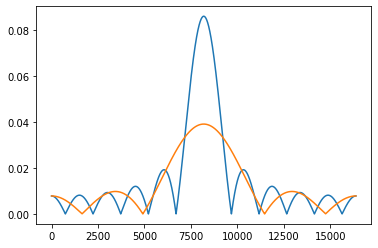

In [380]:
#plt.plot(np.abs(W).reshape([P*Nfft]))
plt.plot(np.abs(W1).reshape([P*Nfft]))
plt.plot(np.abs(W2).reshape([P*Nfft]))


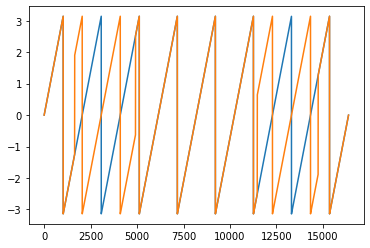

In [381]:
#plt.plot(np.angle(W).reshape([P*Nfft]))
t=np.arange(P*Nfft)/Nfft
plt.plot(np.angle(np.exp(2j*np.pi*t*0.5)))
plt.plot(np.angle(W2).reshape([P*Nfft]))


C:\Users\Kruger\AppData\Local\Temp/ipykernel_5064/3029116292.py:30: RuntimeWarning: divide by zero encountered in log10
  def P2dB(X): return 10*np.log10(X)
C:\Users\Kruger\AppData\Local\Temp/ipykernel_5064/3029116292.py:30: RuntimeWarning: divide by zero encountered in log10
  def P2dB(X): return 10*np.log10(X)


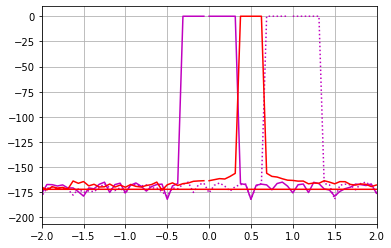

In [382]:
#Fw=np.fft.fft(W.reshape([P*Nfft]),norm='ortho')
Fw1=np.fft.fft(W1.reshape([P*Nfft]),norm='ortho')
Fw2=np.fft.fft(W2.reshape([P*Nfft]),norm='ortho')
#plt.plot(x,P2dB(np.abs(Fw)),'b-')
plt.plot(x,P2dB(np.abs(Fw1)),'m-')
plt.plot(x+1,P2dB(np.abs(Fw1)),'m:')
plt.plot(x,P2dB(np.abs(Fw2)),'r-')
#plt.plot(x,(np.angle(Fw)/np.pi*180),'bx')
#plt.plot(x,(np.angle(Fw2)/np.pi*180),'rx')
plt.xlim(-2,2)
plt.grid()


In [420]:
Nb=1024*8;
Nt=Nb*Nfft;
t=np.arange(Nt)/Nfft

S=np.random.normal(scale=1,size=Nt)
#S+=np.cos(2*np.pi*t*6.5)*1e6
#S+=np.cos(2*np.pi*t*6.125)*1e6
#S+=np.cos(2*np.pi*t*(6.3125))*1e6
S2=S*np.exp(2j*np.pi*t*0.5e-3)

(0.0, 10.0)

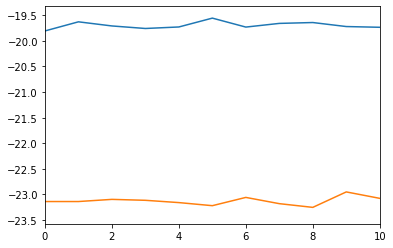

In [421]:
F=fftw(S.reshape([Nb,Nfft]),W1,P)
F2=fftw(S.reshape([Nb,Nfft]),W2,P)#[::2,:]
Fp=np.mean((F*F.conj()).real,axis=0)
Fp2=np.mean((F2*F2.conj()).real,axis=0)
plt.plot(P2dB(Fp))
plt.plot(P2dB(Fp2))
#plt.plot(P2dB(Fp3))
plt.xlim(0,10)

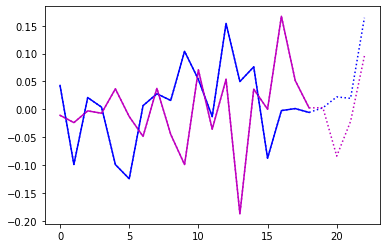

In [422]:
#Real values FFT, second half is conj first half
plt.plot(F[0,1:20].real,'b-')
plt.plot(F[0,1:20].imag,'m-')
plt.plot(F[0,1024:1000:-1].real,'b:')
plt.plot(-F[0,1024:1000:-1].imag,'m:')


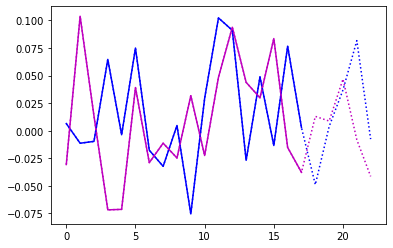

In [423]:
#Shifted FFT, second half is conj first half, 1 bin shifted
plt.plot(F2[0,2:20].real,'b-')
plt.plot(F2[0,2:20].imag,'m-')
plt.plot(F2[0,1024:1000:-1].real,'b:')
plt.plot(-F2[0,1024:1000:-1].imag,'m:')


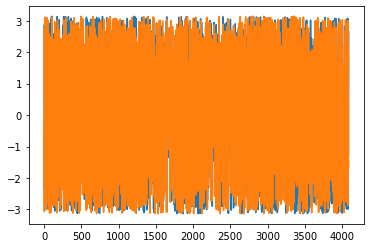

In [424]:
plt.plot(np.angle(F2[::2,2]))
plt.plot(np.angle(-F2[1::2,2]))


(-25.0, 5.0)

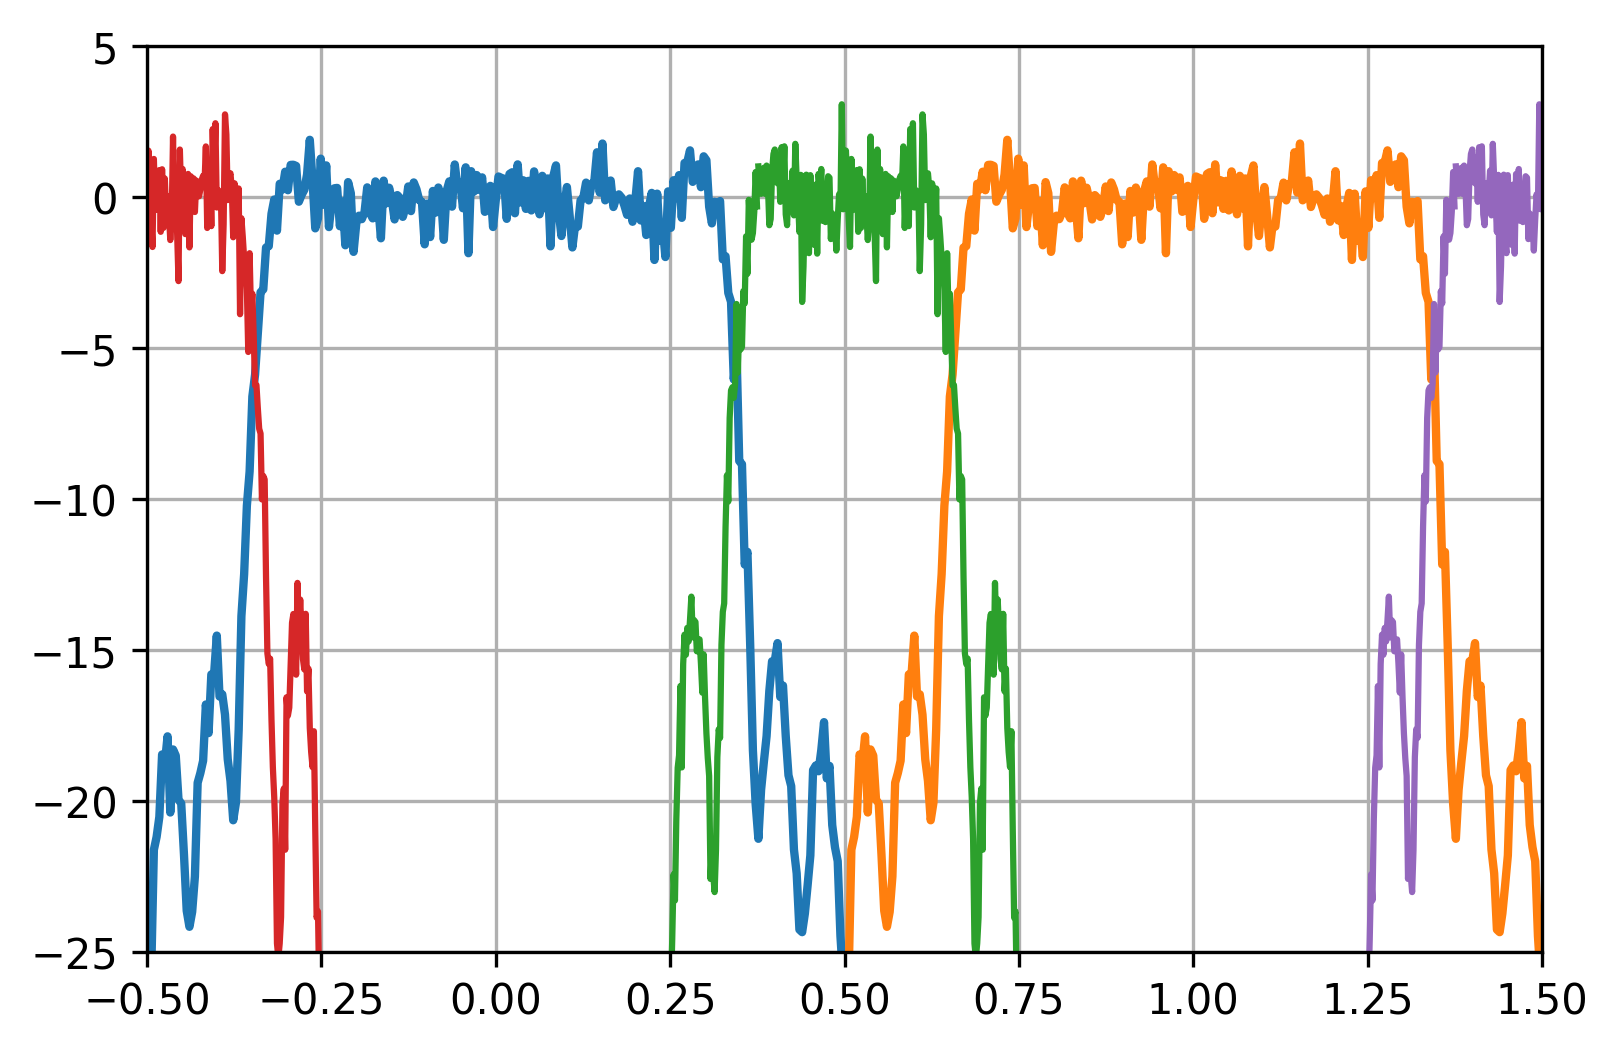

In [439]:
plt.figure(dpi=300)
NFF=len(F[:,6])
NA=8*4
NFF//=NA;
FF=np.fft.fft(F[:NA*NFF,6].reshape(NA,NFF),axis=1)
FF=np.roll(FF,NFF//2,axis=1)
FF=np.mean((FF*FF.conj()).real,axis=0)
y1=np.arange(NFF)/NFF
y1-=1*(y1>0.5)
y1=np.roll(y1,NFF//2)
plt.plot(y1,P2dB(np.abs(FF))-6,linewidth=2)
plt.plot(y1+1,P2dB(np.abs(FF))-6,linewidth=2)

NFF2=len(F2[::2,7])
NFF2//=NA;
FF2=np.fft.fft(F2[:NA*NFF:2,7].reshape(NA//2,NFF),axis=1)

FF2=np.roll(FF2,NFF2//2,axis=1)
FF2=np.mean((FF2*FF2.conj()).real,axis=0)
y2=np.arange(len(FF2))/len(FF2)
y2-=1*(y2>0.5)
y2=np.roll(y2,NFF2//2)
plt.plot(y2/2+0.5,P2dB(np.abs(FF2))-3)
plt.plot(y2/2-0.5,P2dB(np.abs(FF2))-3)
plt.plot(y2/2+1.5,P2dB(np.abs(FF2))-3)

plt.grid()
#FF2=np.fft.fft(F2[::2,7])
#plt.plot(P2dB(np.abs(FF2)))
#plt.plot(np.angle(F[::2,6]))
#plt.plot(np.angle(F2[::2,7]))
#plt.plot(np.angle(-F2[1::2,2]))
plt.xlim(-0.5,1.5)
plt.ylim(-25,5)